In [578]:
!pip install -r requirements.txt

# importo le librerie di python

In [579]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# leggo i file .csv

In [580]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [581]:
train['DEATH_EVENT'].value_counts()

0    133
1     58
Name: DEATH_EVENT, dtype: int64

# Verifico se contengono valori nulli: il file che ci è stato fornito non contiene valori nulli, ma siccome non conosco il data set finale, ho messo un controllo sui valori nulli

In [582]:
train.isnull().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [583]:
test.isnull().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [584]:
#elimino eventuali righe con valori nulli
train = train.dropna()
test = test.dropna()

# Analisi dei dati

In [585]:
#trasformo age e platelets serum_creatinine in int 
train['age'] = train['age'].astype('int64')
test['age'] = test['age'].astype('int64')
train['platelets'] = train['platelets'].astype('int64')
test['platelets'] = test['platelets'].astype('int64')

In [586]:
#elimino le righe che hanno età < 0 il che è impossibile
age = train.query('age < 0').index.values
train.drop(age, inplace=True)

In [587]:
#elimino le righe che hanno età < 0 il che è impossibile
age = test.query('age < 0').index.values
test.drop(age, inplace=True)

In [588]:
#elimino le righe che hanno platelets < 0 il che è impossibile
piastrine = train.query('platelets < 0').index.values
train.drop(piastrine, inplace=True)

In [589]:
#elimino le righe che hanno platelets < 0 il che è impossibile
piastrine = test.query('platelets < 0').index.values
test.drop(piastrine, inplace=True)

In [590]:
#elimino le righe che hanno ejection_fraction< 0 il che è impossibile
ejection_fraction = train.query('ejection_fraction < 0').index.values
train.drop(ejection_fraction, inplace=True)

In [591]:
#elimino le righe che hanno ejection_fraction < 0 il che è impossibile
ejection_fraction = test.query('ejection_fraction < 0').index.values
test.drop(ejection_fraction, inplace=True)

In [592]:
#elimino le righe che hanno creatinine_phosphokinase < 0 il che è impossibile
creatinine_phosphokinase = train.query('creatinine_phosphokinase < 0').index.values
train.drop(creatinine_phosphokinase, inplace=True)

In [593]:
#elimino le righe che hanno creatinine_phosphokinase < 0 il che è impossibile
creatinine_phosphokinase = test.query('creatinine_phosphokinase < 0').index.values
test.drop(creatinine_phosphokinase, inplace=True)

In [594]:
#elimino le righe che hanno serum_sodium < 0 il che è impossibile
serum_sodium = train.query('serum_sodium < 0').index.values
train.drop(serum_sodium, inplace=True)

In [595]:
#elimino le righe che hanno serum_sodium < 0 il che è impossibile
serum_sodium = test.query('serum_sodium < 0').index.values
test.drop(serum_sodium, inplace=True)

In [596]:
#elimino le righe che hanno time < 0 il che è impossibile
time = train.query('time < 0').index.values
train.drop(time, inplace=True)

In [597]:
#elimino le righe che hanno time < 0 il che è impossibile
time = test.query('time < 0').index.values
test.drop(time, inplace=True)

In [598]:
#elimino le righe che hanno serum_creatinine < 0 il che è impossibile
serum_creatinine = train.query('serum_creatinine < 0').index.values
train.drop(serum_creatinine, inplace=True)

In [599]:
#elimino le righe che hanno serum_creatinine < 0 il che è impossibile
serum_creatinine = test.query('serum_creatinine < 0').index.values
test.drop(serum_creatinine, inplace=True)

In [600]:
#creo una nuova colonna dove raggruppo per età: questo mi è sembrato più conveniente per capire 
#quale categoria tra adulto bambino e anziano ha più probabilità di morte
def age(age):
    if age >= 0 and age <18:
        return "Bambino"
    elif age >= 18 and age < 60:
        return "Adulto"
    elif age >= 60:
        return "Anziano"
   
train["gruppoEtà"] = train['age'].apply(age)

train.drop(columns=['age'], inplace=True)

In [601]:
#creo una nuova colonna dove raggruppo per età
def age(age):
    if age >= 0 and age <18:
        return "Bambino"
    elif age >= 18 and age < 60:
        return "Adulto"
    elif age >= 60:
        return "Anziano"
   
test["gruppoEtà"] = test['age'].apply(age)

test.drop(columns=['age'], inplace=True)

In [602]:
#creo una nuova colonna dove raggruppo per piastrine
#NB:IN FASE DI TEST,NON HO NOTATO MIGLIORAMENTI FACENDO UN RAGGRUPPAMENTO PER PIASTRINE
#def piastrine(piastrine):
 #   if piastrine >= 0 and piastrine < 250000:
 #       return "Basso"
  #  elif piastrine >= 250000 and piastrine < 750000:
   #     return "Normale"
    #elif piastrine >= 750000:
    #    return "Alto"
   
#train["livelloPiastrine"] = train['platelets'].apply(piastrine)

#train.drop(columns=['platelets'], inplace=True)

In [603]:
#creo una nuova colonna dove raggruppo per piastrine
#NB:IN FASE DI TEST,NON HO NOTATO MIGLIORAMENTI FACENDO UN RAGGRUPPAMENTO PER PIASTRINE
#def piastrine(piastrine):
 #   if piastrine >= 0 and piastrine < 250000:
 #       return "Basso"
  #  elif piastrine >= 250000 and piastrine < 750000:
   #     return "Normale"
    #elif piastrine >= 750000:
    #    return "Alto"
   
#test["livelloPiastrine"] = test['platelets'].apply(piastrine)

#test.drop(columns=['platelets'], inplace=True)

In [604]:
np.sort(train['ejection_fraction'].unique())

array([15, 17, 20, 25, 30, 35, 38, 40, 45, 50, 55, 60, 62, 65, 70, 80])

In [605]:
#creo una nuova colonna dove raggruppo per ejection_fraction
def ejection_fraction(ejection_fraction):
    if ejection_fraction >= 0 and ejection_fraction < 40:
        return "<40"
    elif ejection_fraction >= 40:
        return ">40"
   
train["range_ejection"] = train['ejection_fraction'].apply(ejection_fraction)

train.drop(columns=['ejection_fraction'], inplace=True)

In [606]:
#creo una nuova colonna dove raggruppo per ejection_fraction
def ejection_fraction(ejection_fraction):
    if ejection_fraction >= 0 and ejection_fraction < 40:
        return "<40"
    elif ejection_fraction >= 40:
        return ">40"
   
test["range_ejection"] = test['ejection_fraction'].apply(ejection_fraction)

test.drop(columns=['ejection_fraction'], inplace=True)

# tramite i grafici vedo quali sono le features da tenere in considerazione. sono arrivata alla conclusione che tutte sono importanti tranne "time" perchè la morte del paziente non è dovuto al tempo che esso è in osservazione, ma delle sue abitudini e caratteristiche cardiovascolari. Inoltre un paziente molto grave probabilmente ha un periodo di osservazione più basso rispetto ad altri pazienti e addestare il modello anche con time porterebbe ad avere time come discriminante.

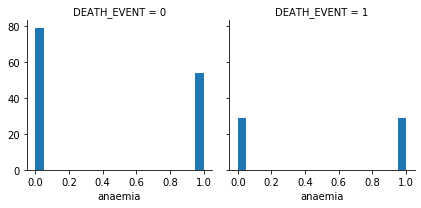

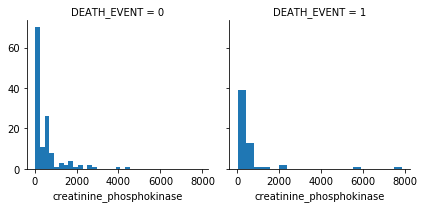

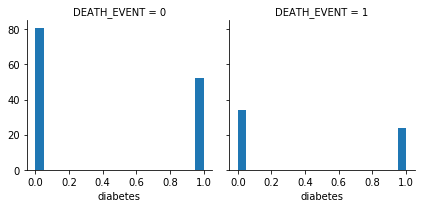

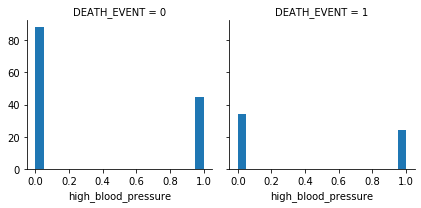

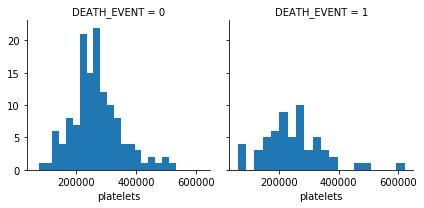

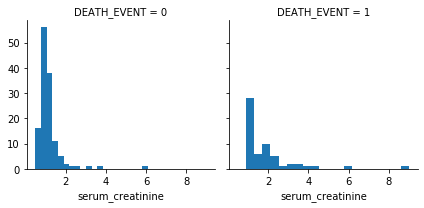

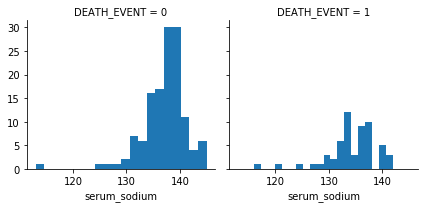

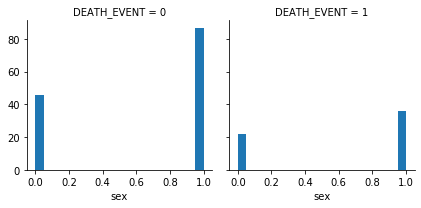

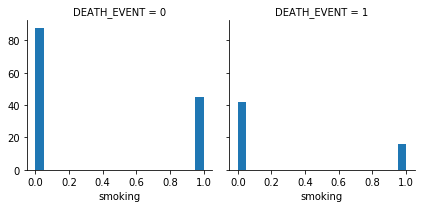

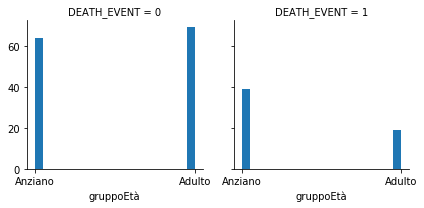

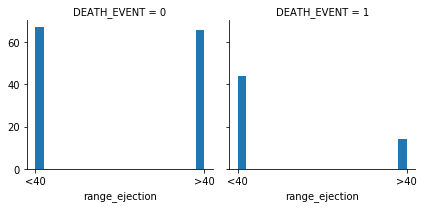

In [607]:
for c in train.drop(["DEATH_EVENT", "time"],axis=1).columns:
    fighist = sns.FacetGrid(train, col = 'DEATH_EVENT')
    fighist.map(plt.hist, c, bins=20)

In [608]:
train[['DEATH_EVENT', 'smoking']].groupby(['smoking']).count()

,DEATH_EVENT
smoking,
0,130
1,61


In [609]:
train[['DEATH_EVENT', 'smoking']].groupby(['smoking']).mean()

,DEATH_EVENT
smoking,
0,0.323077
1,0.262295


In [610]:
train[['DEATH_EVENT', 'range_ejection']].groupby(['range_ejection']).count()

,DEATH_EVENT
range_ejection,
<40,111
>40,80


In [611]:
train[['DEATH_EVENT', 'range_ejection']].groupby(['range_ejection']).mean()

,DEATH_EVENT
range_ejection,
<40,0.396396
>40,0.175000


In [612]:
train[['DEATH_EVENT', 'platelets']].groupby(['platelets']).count()

,DEATH_EVENT
platelets,
62000,1
70000,1
73000,1
75000,1
87000,1
...,...
497000,1
504000,1
507000,1


In [613]:
train[['DEATH_EVENT', 'platelets']].groupby(['platelets']).mean()

,DEATH_EVENT
platelets,
62000,1.0
70000,1.0
73000,0.0
75000,1.0
87000,1.0
...,...
497000,1.0
504000,0.0
507000,0.0


In [614]:
train[['DEATH_EVENT', 'gruppoEtà']].groupby(['gruppoEtà']).count()

,DEATH_EVENT
gruppoEtà,
Adulto,83
Anziano,108


In [615]:
train[['DEATH_EVENT', 'gruppoEtà']].groupby(['gruppoEtà']).mean()

,DEATH_EVENT
gruppoEtà,
Adulto,0.228916
Anziano,0.361111


In [616]:
train[['DEATH_EVENT', 'diabetes']].groupby(['diabetes']).count()

,DEATH_EVENT
diabetes,
0,115
1,76


In [617]:
train[['DEATH_EVENT', 'diabetes']].groupby(['diabetes']).mean()

,DEATH_EVENT
diabetes,
0,0.295652
1,0.315789


In [618]:
train.drop(columns=['time'], inplace=True)
test.drop(columns=['time'], inplace=True)

In [619]:
#applico labelencoder per associare ai tipi object un valore intero
s = (train.dtypes == 'object')
object_cols = list(s[s].index)
label_train = train.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_train[col] = label_encoder.fit_transform(label_train[col])

In [620]:
#applico labelencoder per associare ai tipi object un valore intero
s = (test.dtypes == 'object')
object_cols = list(s[s].index)
label_test = test.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_test[col] = label_encoder.fit_transform(label_test[col])
    

In [621]:
y_train = label_train["DEATH_EVENT"]
x_train = label_train.drop(['DEATH_EVENT'], axis=1)

y_test = label_test["DEATH_EVENT"]
x_test = label_test.drop(['DEATH_EVENT'], axis=1)

In [622]:
#definisco il modello
model = DecisionTreeClassifier(max_depth = 3,random_state=0)
#addestro il modello
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [623]:
#stampa accuracy
print("accuracy on test set:", model.score(x_test, y_test) * 100, '%')
print("accuracy on train set:", model.score(x_train, y_train) * 100, '%')

accuracy on test set: 75.0 %
accuracy on train set: 81.67539267015707 %


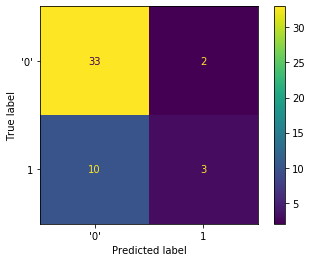

In [624]:
plot_confusion_matrix(model, x_test.values, y_test.values, display_labels=["'0'","1"])
plt.show()

CONCLUSIONI
Ho notato che l'accuracy  varia in base allo split che fatto ma questa si potrebbe migliorare mediante cross-validation. Il dataset infatti è molto piccolo per ottenere buone prestazioni e la suddivisione in train e test potrebbe essere non corretta. Appunto per avere una prestazione migliore si dovrebbero usare i paramatri di tuning per bilanciare. inoltre in base allo split che viene fatto, alcune volte è migliore la logist regression e altre volte il decision tree. Lascio come modello il decision tree. Ho provato anche con KNeighborsClassifier ma da risultati peggiori rispetto agli altri due quindi non lo mostro.
Inolte i dati sono sbilanciati e il modello tende a rispondere per la maggior parte delle volte 0.